<h2 style="text-align: center;">What features influence the price of the laptop?</h2>
<h4 style="text-align: center;"><span style="color:#808080">Joram Mutenge and Noel Thomas</span></h4>
<h6 style="text-align: center;"><span style="color:#808080">IS 517</span></h6>

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Importing and loading the data

In [2]:
# Loading the data.
data = pd.read_csv('data.csv')
data

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


## Exploratory Data Analysis (EDA) and Transformations

In [3]:
# Check the data types in columns.
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [4]:
# Check missing values
data.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

Although no missing values are shown, some columns like processor_gnrtn had the word ‘missing’ rather than NaN in some rows to indicate missing values. 

In [5]:
# See the brands present
data['model'].unique()

array(['A6-9225', 'Ideapad', 'PURA', 'APU', 'Athlon', 'Aspire',
       'ExpertBook', 'Missing', 'v15', 'VivoBook', 'EeeBook', 'Nitro',
       'Cosmos', 'x360', 'IdeaPad', 'Celeron', '15q', '250-G6', 'Vostro',
       '15', 'Pavilion', 'Book', 'Inspiron', 'INBook', 'ThinkPad',
       'Chromebook', 'Commercial', '14s', 'INSPIRON', 'V15', '15s',
       '3000', 'Notebook', 'Vivo', 'DA', 'Insprion', 'Travelmate', '14a',
       'Predator', 'Spin', 'Swift', 'ROG', 'XPS', 'Omen', 'Surface',
       't.book', 'Yoga', 'Gram', 'Spectre', 'VivoBook14', 'TUF',
       'Book(Slim)', 'Pro', 'PureBook', 'ASUS', 'Katana', 'GF63',
       'Thinkbook', 'Intel', 'G15', 'ZenBook', 'Legion', 'Modern',
       'ThinkBook', 'Prestige', 'Zenbook', 'MacBook', 'Sword', 'Envy',
       'SE', 'ConceptD', 'HP', 'DELL', 'X390', 'Thinpad', 'Inpiron',
       'GAMING', 'GS', '430', 'Liber', 'F17', 'B50-70', 'GE76', 'GP65',
       'GP76', '250', '3511', 'G3', 'GS66', 'X1', 'GF65', 'Stealth',
       'Zephyrus', 'Summit', 'OMEN

In [6]:
#Check count of brands.
data.brand.value_counts(dropna=False)

ASUS         254
DELL         154
Lenovo       148
HP           142
acer          58
MSI           52
APPLE         28
Avita         18
Vaio           5
LG             5
Nokia          4
ALIENWARE      4
realme         4
Infinix        4
lenovo         3
Smartron       3
MICROSOFT      3
RedmiBook      3
Mi             2
iball          1
SAMSUNG        1
Name: brand, dtype: int64

In [7]:
#Rename some columns
col_map = {
    'processor_gnrtn': 'processor_gen',
    'ram_gb': 'ram',
    'old_price': 'price'
}
data = data.rename(columns=col_map)

In [8]:
#Clean the dataframe
def tweak_data(data):
    #Relevant columns
    cols = ['processor_gen', 'ram', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
           'warranty', 'Touchscreen', 'msoffice', 'price', 'star_rating']
    return(data
     [cols]
     .assign(processor_gen=data.processor_gen.replace('Missing', np.NaN).str.extract(r'(\d+)+').astype('float16'),
             ram=data.ram.str.extract(r'(\d+)+').astype('int16'),
             ssd=data.ssd.str.extract(r'(\d+)+').astype('int16'),
             hdd=data.hdd.str.extract(r'(\d+)+').astype('int16'),
             os_bit=data.os_bit.str.extract(r'(\d+)+').astype('int16'),
            )
     .astype({'graphic_card_gb': 'int8', 'warranty': 'int8', 'price': 'int32'})
    )
df = tweak_data(data)

The function above transforms the data frame by selecting the relevant columns. The word ‘missing’ in processor_gen is replaced with NaN and the data type changed to float. For columns ram, ssd, os_bit, and hdd digits are extracted from their row values and the data type changed to integer. The data type of other columns such as graphic_card_gb, warranty, and price is also changed to integer.

In [9]:
# View transformed dataframe.
df

,processor_gen,ram,ssd,hdd,os,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,price,star_rating
0,10.0,4,0,1024,Windows,64,0,0,No,No,32790,3.7
1,10.0,4,0,512,Windows,64,0,0,No,No,21325,3.6
2,10.0,4,128,0,Windows,64,0,0,No,No,27990,3.7
3,10.0,4,128,0,Windows,64,0,0,No,No,27990,3.7
4,10.0,4,256,0,Windows,64,0,0,No,No,33490,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...
891,NaN,4,1024,0,Windows,64,0,1,No,No,194990,0.0
892,NaN,4,1024,0,Windows,64,4,1,No,No,0,0.0
893,NaN,4,1024,0,Windows,64,4,1,No,No,0,0.0
894,NaN,4,0,512,Windows,32,0,0,No,No,47990,0.0


In [10]:
# Show statistics of numerical columns.
df.describe()

,processor_gen,ram,ssd,hdd,os_bit,graphic_card_gb,warranty,price,star_rating
count,657.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,10.328125,8.531250,432.321429,226.857143,59.178571,1.198661,0.691964,88134.154018,2.980469
std,0.962891,4.376055,316.118420,405.394129,11.453644,2.057454,0.606282,55719.645554,1.965254
min,4.000000,4.000000,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,4.000000,256.000000,0.000000,64.000000,0.000000,0.000000,54940.500000,0.000000
50%,11.000000,8.000000,512.000000,0.000000,64.000000,0.000000,1.000000,78052.500000,4.100000
75%,11.000000,8.000000,512.000000,512.000000,64.000000,2.000000,1.000000,111019.500000,4.400000
max,12.000000,32.000000,3072.000000,2048.000000,64.000000,8.000000,3.000000,377798.000000,5.000000


In [12]:
#Check correlation of other features with price.
(df
 .corr(method='pearson', numeric_only=True)
 .style.background_gradient(cmap='Greens', axis=0)
)

,processor_gen,ram,ssd,hdd,os_bit,graphic_card_gb,warranty,price,star_rating
processor_gen,1.000000,0.110624,0.226558,-0.143252,0.018421,-0.004779,0.123125,0.108406,-0.017618
ram,0.110624,1.000000,0.396407,-0.180229,0.122495,0.275676,0.087017,0.413835,-0.044368
ssd,0.226558,0.396407,1.000000,-0.579884,0.229685,0.285320,0.202927,0.488710,-0.119142
hdd,-0.143252,-0.180229,-0.579884,1.000000,-0.174198,-0.032831,-0.143631,-0.246925,0.060426
os_bit,0.018421,0.122495,0.229685,-0.174198,1.000000,-0.139860,0.290472,-0.007944,0.043147
graphic_card_gb,-0.004779,0.275676,0.285320,-0.032831,-0.139860,1.000000,-0.042251,0.462580,-0.013381
warranty,0.123125,0.087017,0.202927,-0.143631,0.290472,-0.042251,1.000000,0.051954,0.093033
price,0.108406,0.413835,0.488710,-0.246925,-0.007944,0.462580,0.051954,1.000000,-0.075707
star_rating,-0.017618,-0.044368,-0.119142,0.060426,0.043147,-0.013381,0.093033,-0.075707,1.000000


Columns: ram, ssd, and graphic_crd_gb have a higher correlation with price.

Count for ram size:
8     454
4     259
16    180
32      3
Name: ram, dtype: int64


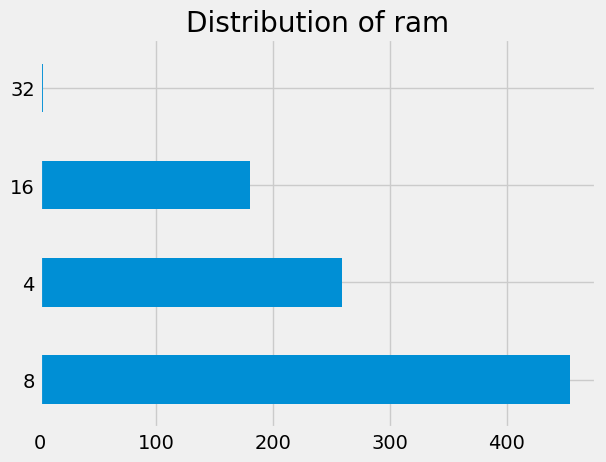

In [13]:
#Distribution of ram
(print(f'Count for ram size:\n{df.ram.value_counts()}'),
 df
 .ram.value_counts()
 .plot(kind = 'barh', title = 'Distribution of ram')
);

More laptops had 8GB RAM. Surprisingly, there were very few 32GB laptops were present.

Count for ssd size:
512     417
256     201
0       151
1024    111
128      12
2048      2
32        1
3072      1
Name: ssd, dtype: int64


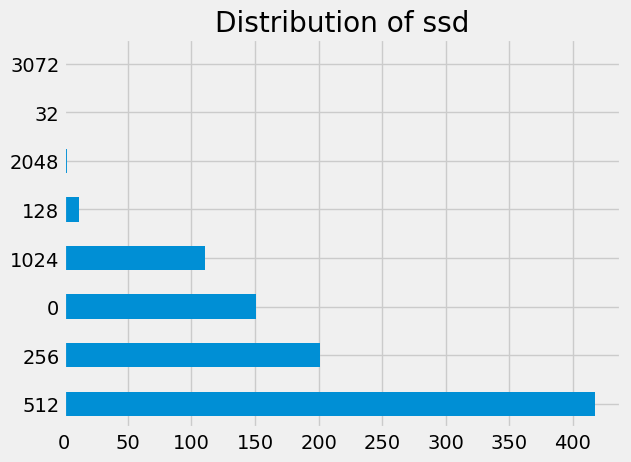

In [14]:
#Distribution of Solid State Drive
(print(f'Count for ssd size:\n{df.ssd.value_counts()}'),
 df
 .ssd.value_counts()
 .plot(kind = 'barh', title = 'Distribution of ssd')
);

More laptops had 512GB ssd size.

Count for graphic card size:
0    631
4    138
2     69
6     40
8     18
Name: graphic_card_gb, dtype: int64


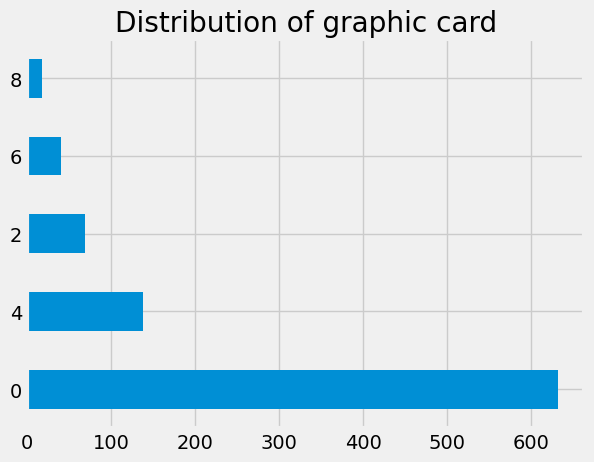

In [15]:
#Distribution of 
(print(f'Count for graphic card size:\n{df.graphic_card_gb .value_counts()}'),
 df
 .graphic_card_gb.value_counts()
 .plot(kind = 'barh', title = 'Distribution of graphic card')
);

Many laptops did not have graphic cards.

In [16]:
#Check percentage of null values for each column
(df
 .isna()
 .mean()
)

processor_gen      0.266741
ram                0.000000
ssd                0.000000
hdd                0.000000
os                 0.000000
os_bit             0.000000
graphic_card_gb    0.000000
warranty           0.000000
Touchscreen        0.000000
msoffice           0.000000
price              0.000000
star_rating        0.000000
dtype: float64

In [17]:
#Drop columns with more than 25% null values.
null_cols = df.columns[df.isna().mean() > .25]
df = df.drop(null_cols, axis=1)

In [18]:
# See data types when you data frame.
df.dtypes

ram                  int16
ssd                  int16
hdd                  int16
os                  object
os_bit               int16
graphic_card_gb       int8
warranty              int8
Touchscreen         object
msoffice            object
price                int32
star_rating        float64
dtype: object

The column processing_gen was deleted having more than 25% of missing values.

In [19]:
#Map column name with count of unique values for object type
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column]=='object'}

{'os': 3, 'Touchscreen': 2, 'msoffice': 2}

In [20]:
# Function to one-hot encode columns.
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1) #drop original col after creating dummies
    return df     

In [21]:
#Call the function to create the columns.
df = onehot_encode(
    df,
    ['os', 'Touchscreen', 'msoffice'], #columns
    ['os', 'touch', 'office']
)

In [22]:
# View final dataframe
df

,ram,ssd,hdd,os_bit,graphic_card_gb,warranty,price,star_rating,os_DOS,os_Mac,os_Windows,touch_No,touch_Yes,office_No,office_Yes
0,4,0,1024,64,0,0,32790,3.7,0,0,1,1,0,1,0
1,4,0,512,64,0,0,21325,3.6,0,0,1,1,0,1,0
2,4,128,0,64,0,0,27990,3.7,0,0,1,1,0,1,0
3,4,128,0,64,0,0,27990,3.7,0,0,1,1,0,1,0
4,4,256,0,64,0,0,33490,3.7,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,4,1024,0,64,0,1,194990,0.0,0,0,1,1,0,1,0
892,4,1024,0,64,4,1,0,0.0,0,0,1,1,0,1,0
893,4,1024,0,64,4,1,0,0.0,0,0,1,1,0,1,0
894,4,0,512,32,0,0,47990,0.0,0,0,1,1,0,1,0


### Multiple Linear Regression (using statsmodels):

We used the statsmodels package to run Multiple Linear Regression.

In [23]:
X = df[['ram', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'warranty',
       'star_rating', 'os_DOS', 'os_Mac', 'os_Windows', 'touch_No',
       'touch_Yes', 'office_No', 'office_Yes']]

y = df['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [25]:
X_train_sm = X_train 
X_train_sm = sm.add_constant(X_train_sm)

lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const              45271.983591
ram                 1962.221886
ssd                   49.505373
hdd                   -1.910922
os_bit                11.790182
graphic_card_gb     9690.291527
warranty           -3848.429690
star_rating        -2016.309278
os_DOS             17912.371033
os_Mac             58152.889184
os_Windows        -30793.276626
touch_No            2127.467304
touch_Yes          43144.516287
office_No          20200.575059
office_Yes         25071.408532
dtype: float64

In [26]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     58.37
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           5.15e-88
Time:                        14:15:31   Log-Likelihood:                -7536.3
No. Observations:                 627   AIC:                         1.510e+04
Df Residuals:                     615   BIC:                         1.515e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.527e+04   4772.493     

We can see that for every 1 unit increase in RAM, there is a 1962 unit increase in the price of a laptop.

Since the Adj. R-Squared values are not high, we tried to remove the variables with high P-values and run the model again.

In [27]:
X = df[['ram', 'ssd',  'graphic_card_gb',
       'star_rating', 'os_DOS', 'os_Mac', 'os_Windows',
       'touch_Yes', 'office_No', 'office_Yes']]

X_train_sm, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)
 
X_train_sm = sm.add_constant(X_train_sm)

lm_2 = sm.OLS(y_train,X_train_sm).fit()

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     80.23
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           1.74e-90
Time:                        14:15:37   Log-Likelihood:                -7537.1
No. Observations:                 627   AIC:                         1.509e+04
Df Residuals:                     618   BIC:                         1.513e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.487e+04   3779.690     

The Adj. R-Squared value for the new model is 0.503 (which is not much of an improvement). This model was accepted to study the relationship between the independent variables and the dependent variables.

### K-Means Clustering

We selected the number of clusters by plotting the silhouette scores and the Scree plot.

Overall Average Silhouette Score:0.6149 for 2 clusters
Overall Average Silhouette Score:0.5382 for 3 clusters
Overall Average Silhouette Score:0.5154 for 4 clusters
Overall Average Silhouette Score:0.5403 for 5 clusters
Overall Average Silhouette Score:0.5666 for 6 clusters
Overall Average Silhouette Score:0.5744 for 7 clusters
Overall Average Silhouette Score:0.5753 for 8 clusters
Overall Average Silhouette Score:0.5624 for 9 clusters
Overall Average Silhouette Score:0.5635 for 10 clusters
Overall Average Silhouette Score:0.5470 for 11 clusters
Overall Average Silhouette Score:0.5602 for 12 clusters
Overall Average Silhouette Score:0.5633 for 13 clusters
Overall Average Silhouette Score:0.5635 for 14 clusters
Overall Average Silhouette Score:0.5769 for 15 clusters
Overall Average Silhouette Score:0.5699 for 16 clusters



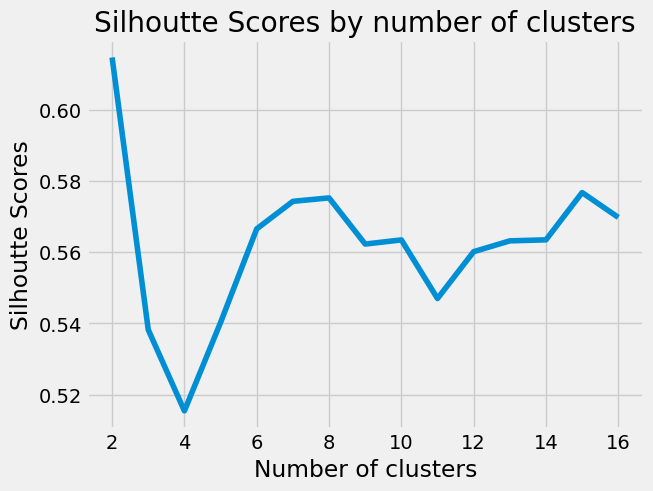

In [28]:
wcss = []
sh_score = []
for i in range(2, 17):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    label = kmeans.fit_predict(df)
    kmeans_silhouette = silhouette_score(df, label)
    sh_score.append(kmeans_silhouette)
    print("Overall Average Silhouette Score:{:.4f} for {} clusters".format(kmeans_silhouette, i))
    
print("")
plt.plot(range(2, 17), sh_score)
plt.title('Silhoutte Scores by number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Scores')
plt.show()

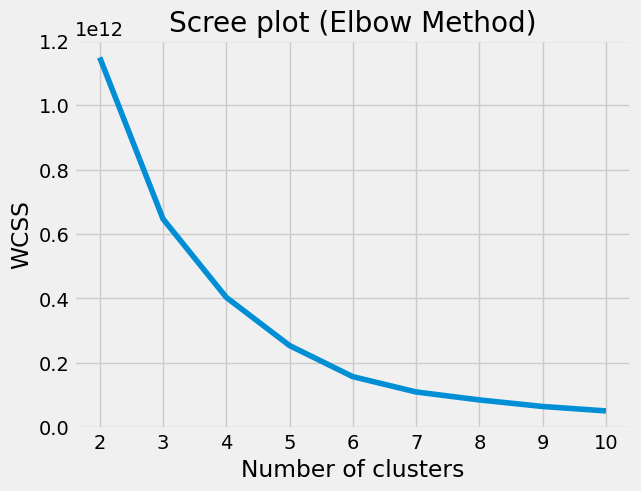

In [29]:
plt.plot(range(2, 11), wcss[:9])
plt.title('Scree plot (Elbow Method)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We decided to select 3 clusters.

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

In [31]:
print("Cluster Centroid Values:")
print(centroids)

Cluster Centroid Values:
[[7.00582524e+00 3.13724272e+02 3.19130097e+02 5.89048544e+01
  4.69902913e-01 6.54368932e-01 5.35003029e+04 3.16815534e+00
  3.10679612e-02 0.00000000e+00 9.68932039e-01 9.51456311e-01
  4.85436893e-02 6.77669903e-01 3.22330097e-01]
 [1.25714286e+01 7.86285714e+02 8.77714286e+01 5.66857143e+01
  3.68571429e+00 6.14285714e-01 2.23942114e+05 2.51428571e+00
  1.42857143e-01 1.57142857e-01 7.00000000e-01 8.14285714e-01
  1.85714286e-01 8.42857143e-01 1.57142857e-01]
 [1.01479100e+01 5.49041801e+02 1.05363344e+02 6.01929260e+01
  1.84565916e+00 7.71704180e-01 1.14918322e+05 2.77459807e+00
  3.21543408e-02 5.46623794e-02 9.13183280e-01 7.90996785e-01
  2.09003215e-01 6.36655949e-01 3.63344051e-01]]


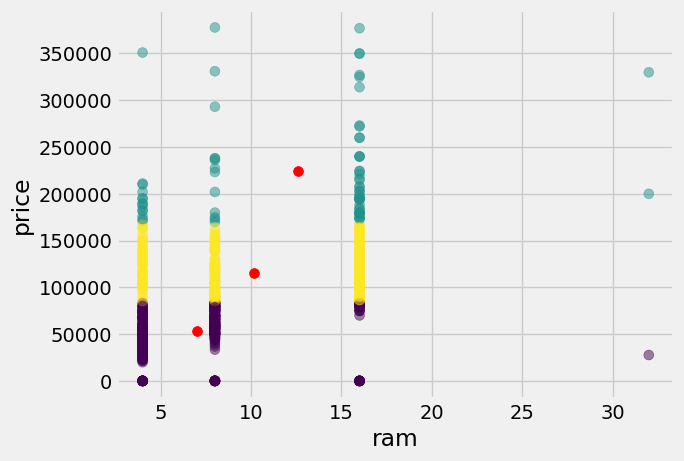

In [32]:
plt.scatter(df['ram'], df['price'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 6], c='red', s=50)
plt.xlabel('ram')
plt.ylabel('price')
plt.show()

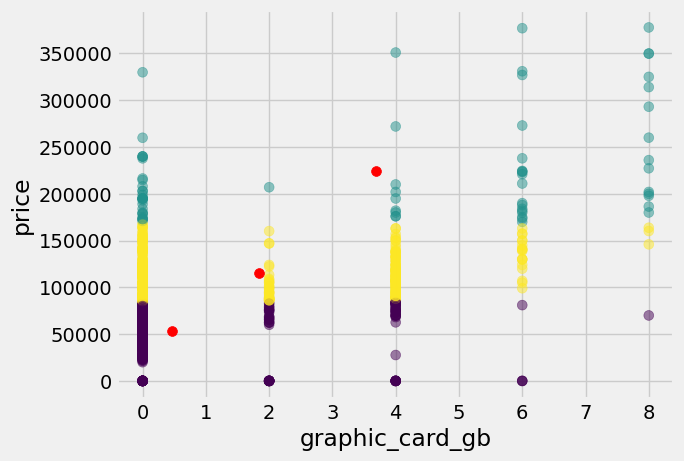

In [33]:
plt.scatter(df['graphic_card_gb'], df['price'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 4], centroids[:, 6], c='red', s=50)
plt.xlabel('graphic_card_gb')
plt.ylabel('price')
plt.show()